In [ ]:
#using these guides
#https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346
#https://github.com/dataman-git/codes_for_articles/blob/master/From%20regression%20to%20RNN.ipynb
#https://datascience.stackexchange.com/questions/93180/trying-to-extend-this-code-to-include-additional-feature-volume-in-addition-to
#https://datascience.stackexchange.com/questions/91147/problems-to-understand-how-to-create-the-input-data-for-time-series-forecasting/92395?noredirect=1#comment97317_92395
#https://towardsdatascience.com/recurrent-neural-networks-for-electricity-price-prediction-a26f8411ea44
#https://github.com/Carterbouley/ElectricityPricePrediction
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [341]:
import pandas as pd
import yfinance as yf
import numpy as np
import sklearn
from yahoofinancials import YahooFinancials
AMZN = yf.download('GOLD', 
                      start='2013-01-01', 
                      progress=False)
# AMZN = yf.download('AMZN') for all 
all_data = AMZN[['Adj Close','Open','High','Low','Close','Volume']].round(2)
#all_data = AMZN[['Adj Close']].round(2)
all_data.head(10)

,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-02,32.08,35.92,36.08,35.38,35.53,7048000
2013-01-03,31.11,35.47,35.55,34.32,34.45,6611600
2013-01-04,31.24,34.06,34.70,33.94,34.60,6942400
2013-01-07,30.78,34.34,34.45,33.99,34.09,6081800
2013-01-08,30.26,34.04,34.06,33.32,33.51,9684000
2013-01-09,30.35,33.56,33.72,33.31,33.61,7252400
2013-01-10,31.15,33.97,34.66,33.91,34.50,8636000
2013-01-11,30.93,34.49,34.51,34.02,34.25,8236700
2013-01-14,30.86,34.42,34.62,34.09,34.18,6118000


In [342]:
len(all_data)
#len(all_data.columns)


2088

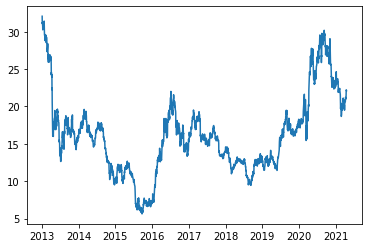

In [344]:
plt.plot(all_data['Adj Close'])

In [345]:
n_steps = 20
n_ahead = 1
epochs_ = 100
batch_size_ = 150

import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt

# Read the data for the parameters from a csv file
import urllib.request
#Delete the first column as it is not used in the tutorial for forecasting


training = ((len(all_data)-n_steps-n_ahead)*.714)
validation = ((len(all_data)-n_steps-n_ahead)*.856)

#can handle both features!
#from sklearn.preprocessing import MinMaxScaler
#sc1 = MinMaxScaler(feature_range=(0,1))
#from sklearn.preprocessing import RobustScaler
#sc1 = RobustScaler().fit(all_data.iloc[:, 0:][0:int(validation)])

from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler().fit(all_data.iloc[:, 0:][0:int(validation)])
ts_train_scaled_1 = sc1.fit_transform(all_data.iloc[:, 0:][0:int(validation)])
ts_test_scaled_1 = sc1.transform(all_data.iloc[:, 0:][int(validation):])

#data = all_data.values
#ts_train_scaled_1 = sc1.fit_transform(all_data.iloc[:, 1][0:int(training)])
#data = np.concatenate((ts_train_scaled_1, all_data[int(validation):].values), axis=0)
data = np.concatenate((ts_train_scaled_1, ts_test_scaled_1), axis=0)

series_reshaped =  np.array([data[i:i + (n_steps+n_ahead)].copy() for i in range(len(data) - (n_steps+n_ahead))])
#series_reshaped2 =  np.array([all_data.values[i:i + (n_steps+n_ahead)].copy() for i in range(len(all_data.values) - (n_steps+n_ahead))])

X_train = series_reshaped[:int(training), :n_steps] 
X_valid = series_reshaped[int(training):int(validation), :n_steps] 
X_test = series_reshaped[int(validation):, :n_steps] 

#assumes first column?
#based on https://raw.githubusercontent.com/Carterbouley/ElectricityPricePrediction/master/re_fixed_multivariate_timeseires.csv
#price is 1st column
Y = np.empty(((len(all_data) - n_steps - n_ahead), n_steps, n_ahead))  
for step_ahead in range(1, n_ahead + 1):     
   Y[..., step_ahead - 1] =   series_reshaped[..., step_ahead:step_ahead + n_steps, 0]
    
Y_train = Y[:int(training)] 
Y_valid = Y[int(training):int(validation)] 
Y_test = Y[int(validation):]


In [335]:

np.random.seed(42)
tf.random.set_seed(42)

from keras.layers import Dense, SimpleRNN, GRU, LSTM
from keras.optimizers import SGD

model6 = keras.models.Sequential([
    
    keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, len(all_data.columns)]),
    keras.layers.SimpleRNN(32, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(n_ahead))
])

#model6.compile(loss="mean_squared_error", optimizer="adam", metrics=['mean_absolute_percentage_error'])

model6.compile(loss="mean_squared_error", optimizer="rmsprop",metrics=['mean_squared_error'])

#history = model6.fit(X_train, Y_train, epochs=epochs_,batch_size=batch_size_,validation_data=(X_valid, Y_valid))
history = model6.fit(X_train, Y_train, epochs=epochs_,batch_size=batch_size_,validation_data=(X_valid, Y_valid))



Epoch 1/100
10/10 [==============================] - 2s 34ms/step - loss: 0.7362 - mean_squared_error: 0.7362 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 7/100
10/10 [=============

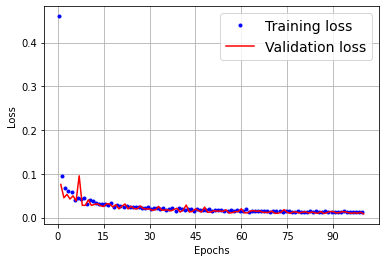

In [336]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [337]:
# - scaler   = the scaler object (it needs an inverse_transform method)
# - data     = the data to be inverse transformed as a Series, ndarray, ... 
#              (a 1d object you can assign to a df column)
# - ftName   = the name of the column to which the data belongs
# - colNames = all column names of the data on which scaler was fit 
#              (necessary because scaler will only accept a df of the same shape as the one it was fit on)
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values


In [ ]:
Y_pred = model6.predict(X_test)

last_list=[]

for i in range (0, len(Y_pred)):
  last_list.append((Y_pred[i][0][n_ahead-1]))
    
actual = pd.DataFrame((sc1.inverse_transform(X_test[:,0])))
actual.rename(columns = {0:'actual'}, inplace = True)
actual['predictions'] = last_list
actual['predictions'] = invTransform(sc1,actual["predictions"],"Adj Close",all_data.columns)
actual['difference'] = (actual['predictions'] - actual['actual']).abs()
actual['difference_percentage'] = ((actual['difference'])/(actual['actual']))*100


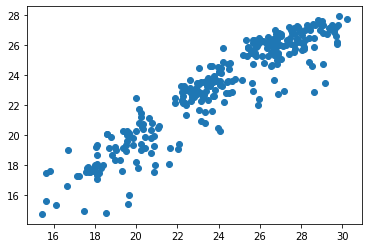

In [338]:
import matplotlib.pyplot as plt
plt.scatter(actual["actual"],actual["predictions"])

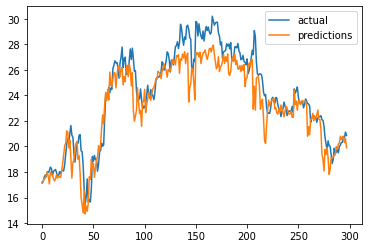

In [339]:
from matplotlib import pyplot as plt
plt.plot(actual["actual"],label="actual")
plt.plot(actual["predictions"],label="predictions")
plt.legend()
plt.show()

In [ ]:

np.random.seed(42)
tf.random.set_seed(42)

model8 = keras.models.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=[None, len(all_data.columns)], activation='tanh'),
    keras.layers.TimeDistributed(keras.layers.Dense(n_ahead))
])

#model8.compile(loss="mape", optimizer="adam")
model8.compile(tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False, name="SGD"),loss='mean_squared_error')
history = model8.fit(X_train, Y_train, epochs=epochs_,batch_size=batch_size_,
                    validation_data=(X_valid, Y_valid))

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
Y_pred = model8.predict(X_test)

last_list=[]

for i in range (0, len(Y_pred)):
  last_list.append((Y_pred[i][0][n_ahead-1]))
    

actual = pd.DataFrame((sc1.inverse_transform(X_test[:,0])))
actual.rename(columns = {0:'actual'}, inplace = True)
actual['predictions'] = last_list
actual['predictions'] = invTransform(sc1,actual["predictions"],"Adj Close",all_data.columns)
actual['difference'] = (actual['predictions'] - actual['actual']).abs()
actual['difference_percentage'] = ((actual['difference'])/(actual['actual']))*100

# from google.colab import files
# actual.to_csv('simplelstmresults.csv') 
# files.download('simplelstmresults.csv')

In [ ]:
from matplotlib import pyplot as plt
plt.plot(actual["actual"],label="actual")
plt.plot(actual["predictions"],label="predictions")
plt.legend()
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss')

np.random.seed(42)
tf.random.set_seed(42)

model9 = keras.models.Sequential([
    keras.layers.LSTM(80, return_sequences= True, input_shape=(n_steps,len(all_data.columns))),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(40, return_sequences= True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(30, return_sequences= True),
    keras.layers.TimeDistributed(keras.layers.Dense(n_ahead))
])

model9.compile(loss="mape", optimizer="adam")
history9 = model9.fit(X_train, Y_train, epochs=epochs_,batch_size=batch_size_,
                    validation_data=(X_valid, Y_valid))#, callbacks = [es] )

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
Y_pred = model9.predict(X_test)

last_list=[]

for i in range (0, len(Y_pred)):
  last_list.append((Y_pred[i][0][n_ahead-1]))
    

actual = pd.DataFrame((sc1.inverse_transform(X_test[:,0])))
actual.rename(columns = {0:'actual'}, inplace = True)
actual['predictions'] = last_list
actual['predictions'] = invTransform(sc1,actual["predictions"],"Adj Close",all_data.columns)
actual['difference'] = (actual['predictions'] - actual['actual']).abs()
actual['difference_percentage'] = ((actual['difference'])/(actual['actual']))*100

# from google.colab import files
# actual.to_csv('simplelstmresults.csv') 
# files.download('simplelstmresults.csv')

In [ ]:
from matplotlib import pyplot as plt
plt.plot(actual["actual"],label="actual")
plt.plot(actual["predictions"],label="predictions")
plt.legend()
plt.show()

In [ ]:
Y_train[:, 3::2]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model10 = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, len(all_data.columns)]),
    keras.layers.GRU(60, return_sequences=True),
    keras.layers.GRU(40, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(n_ahead))
])

model10.compile(loss="mape", optimizer="adam")
history2 = model10.fit(X_train, Y_train[:, 3::2], epochs=epochs_,batch_size=batch_size_,
                    validation_data=(X_valid, Y_valid[:, 3::2]))#, callbacks = [es])

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
Y_pred = model10.predict(X_test)

last_list=[]

for i in range (0, len(Y_pred)):
  last_list.append((Y_pred[i][0][n_ahead-1]))
    

actual = pd.DataFrame((sc1.inverse_transform(X_test[:,0])))
actual.rename(columns = {0:'actual'}, inplace = True)
actual['predictions'] = last_list
actual['predictions'] = invTransform(sc1,actual["predictions"],"Adj Close",all_data.columns)
actual['difference'] = (actual['predictions'] - actual['actual']).abs()
actual['difference_percentage'] = ((actual['difference'])/(actual['actual']))*100

from matplotlib import pyplot as plt
plt.plot(actual["actual"],label="actual")
plt.plot(actual["predictions"],label="predictions")
plt.legend()
plt.show()